# Tensor

本部分讲解Pytroch的核心数据结构tensor，了解tensor的构成，属性，运算等内容。

## 一.  Tensor初认识
Tensor 中文被翻译为张量。张量在不同学科中有不同的意义，在深度学习中张量表示的是一个多维数组，它是标量、向量、矩阵的拓展。标量是零维张量，向量是一维张量，矩阵是二维张量，一个RGB图像的数组就是一个三维张量，第一维是图像的高，第二维是图像的宽，第三维是图像的颜色通道。

在pytorch中，有两个张量的相关概念极其容易混淆，分别是`torch.Tensor`和`torch.tensor`。其实，通过命名规范，可知道`torch.Tensor`是Python的一个类, `torch.tensor`是Python的一个函数。通常我们调用`torch.tensor`进行创建张量，而不直接调用`torch.Tensor`类进行创建。为了进一步区分两者，我们来看看它们代码实现。

**torch.Tensor**：类定义与`torch/_tensor.py#L80`，它继承`torch._C._TensorBase`，这里看到_C就知道要接触C++代码了。

<img src="https://tingsongyu.github.io/PyTorch-Tutorial-2nd/chapter-2/imgs/Tensor.png" width="400" /> 

跳转到torch/C/\_init__.pyi #L839 可以看到：
``` python
# Defined in torch/csrc/autograd/python_variable.cpp
class _TensorBase(metaclass=_TensorMeta):
    requires_grad: _bool
    shape: Size
```
张量的定义和底层C++实现是在python_variable.cpp代码中。

**torch.tensor**：pytorch的一个函数，用于将数据变为张量形式的数据，例如list, tuple, NumPy ndarray, scalar等。

同样，`torch.tensor`的底层实现也是[C++代码](https://github.com/pytorch/pytorch/tree/master/torch/csrc/autograd)，具体实现位于`torch_C_VariableFunctions.pyi`文件。如2.1节所述，.pyi文件用于Python类型检查，而其底层实现在对应的C++代码中。

**推荐用法:**
- 如果你需要从现有数据创建张量，使用 torch.tensor。
- 如果你需要创建一个张量，但尚不想初始化其内容（例如，预分配张量并稍后填充），可以考虑使用其他初始化函数，如 torch.zeros, torch.ones, 或 torch.empty。

## 二.Tensor的作用
tensor之于pytorch等同于ndarray之于numpy，它是pytorch中最核心的数据结构，用于表达各类数据，如输入数据、模型的参数、模型的特征图、模型的输出等。**这里边有一个很重要的数据，就是模型的参数**。对于模型的参数，我们需要更新它们，而更新操作需要记录梯度，梯度的记录功能正是被张量所实现的（求梯度是autograd实现的）。

## 三. Tensor的属性

如下图可知，共有data, dtype，shape, grad, grad_fn, requires_grad, is_leaf, device共八大主要属性。
![tensor的结构](https://tingsongyu.github.io/PyTorch-Tutorial-2nd/chapter-2/imgs/tensor-arch.png)


- data：多维数组，最核心的属性，其他属性都是为其服务的;

- dtype：多维数组的数据类型，tensor数据类型如下，常用到的三种已经用红框标注出来；

- shape：多维数组的形状;

- device: tensor所在的设备，cpu或cuda;

- grad，grad_fn，is_leaf和requires_grad就与Variable一样，**都是梯度计算中所用到的**。

张量的属性还有很多，大家可以通过Pycharm的debug功能进行查看



## 四. Tensor的相关函数

接下来开始学习各类张量的api，主要参考[官方文档](https://pytorch.org/docs/stable/torch.html)，通过右边目录栏可以看出有以下几个部分。
- torchTensors
- Generators
- Random sampling
- Serialization
- Parallelism
- Locally disabling gradient computation
- Math operations
- Utilities

里面有上百个函数，这里只挑高频使用的进行讲解，建议大家自行浏览一遍官方文档，看看都有哪些功能，便于今后使用到的时候不必重复造轮子。

### 4.1 数据类型

以下是常用的torch数据类型：

|   Data type   |      dtype     |
|:---------------|-------------------|
|   32位浮点型      | `torch.float32` or `torch.float`|
|   64位浮点型      | `torch.float64` or `torch.double`|
|   16位浮点型      | `torch.float16` or `torch.half`|
|   32位虚数       | `torch.complex32 ` or `torch.chalf`|
|   8位整型（有符号） | `torch.int8 `|
|   16位整型（有符号  | `torch.int16 ` or `torch.short`|
|   32位整型（有符号）| `torch.int32 ` or `torch.int`|
|   64位整型 （有符号）| `torch.int64 ` or `torch.long`|
|   布尔值          | `torch.bool `|

### 4.2 张量的创建
### 4.2.1 直接创建

**torch.tensor**
`torch.tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False)`
   - data(arry_like)- tensor的初始数据，可以是list,tuple, numpy array, scalar或其他类型
   - dtype(torch.dtype, optional) - tensor的数据类型，如torch.uint8, torch.float, torch.long等
   - device (torch.device, optional) – 决定tensor位于cpu还是gpu。如果为None，将会采用默认值，默认值在torch.set_default_tensor_type()中设置，默认为 cpu。
   - requires_grad (bool, optional) – 决定是否需要计算梯度。
   - pin_memory (bool, optional) – 是否将tensor存于锁页内存。这与内存的存储方式有关，通常为False
   


In [6]:
import torch
import numpy as np

l = [[1., -1.], [2., -2.]]
t_from_l = torch.tensor(l)
t = ((1., -1.), (2., -2.))
t_from_t = torch.tensor(t)
arr = np.array([[1, 2, 3], [4, 5, 6]])
t_from_arr = torch.tensor(arr)

print(t_from_l, t_from_l.dtype)
print(t_from_t, t_from_t.dtype)
print(t_from_arr, t_from_arr.dtype)

tensor([[ 1., -1.],
        [ 2., -2.]]) torch.float32
tensor([[ 1., -1.],
        [ 2., -2.]]) torch.float32
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32) torch.int32


**torch.from_numpy**

还有一种常用的通过numpy创建tensor方法是torch.from_numpy()。这里需要特别注意的是，**创建的tensor和原array共享同一块内存（The returned tensor and ndarray share the same memory. ）**，即当改变array里的数值，tensor中的数值也会被改变。

In [7]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
t_from_numpy = torch.from_numpy(arr)
print("numpy array: ", arr)
print("tensor : ", t_from_numpy)
print("\n修改arr")
arr[0, 0] = 0
print("numpy array: ", arr)
print("tensor : ", t_from_numpy)
print("\n修改tensor")
t_from_numpy[0, 0] = -1
print("numpy array: ", arr)
print("tensor : ", t_from_numpy)

numpy array:  [[1 2 3]
 [4 5 6]]
tensor :  tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

修改arr
numpy array:  [[0 2 3]
 [4 5 6]]
tensor :  tensor([[0, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

修改tensor
numpy array:  [[-1  2  3]
 [ 4  5  6]]
tensor :  tensor([[-1,  2,  3],
        [ 4,  5,  6]], dtype=torch.int32)


### 4.2.2 依数值创建


**torch.zeros():**

`torch.zeros(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`

功能：依给定的size创建一个全0的tensor，**默认数据类型为torch.float32（也称为torch.float）**。

主要参数：

   - layout(torch.layout, optional) - 参数表明张量在内存中采用何种布局方式。常用的有torch.strided, torch.sparse_coo等。

   - out(tensor, optional) - 输出的tensor，即该函数返回的tensor可以通过out进行赋值，请看例子。

In [10]:
o_t = torch.tensor([1])
t = torch.zeros((3,3), out=o_t)
print(t, '\n', o_t)
print(id(t), id(o_t))

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) 
 tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
2091989478352 2091989478352


可以看到，通过out参数的设置将新创建的zero张量赋值给了o_t，两者共享相同的内存.

**torch.zeros_like()**

`torch.zeros_like(input, dtype=None, layout=None, device=None, requires_grad=False)`

功能：依input的size创建全0的tensor。

主要参数：

input(Tensor) - 创建的tensor与intput具有相同的形状。

example:

In [11]:
t1 = torch.tensor([[1., -1.],[2., -2.]])
t2 = torch.zeros_like(t1)

print(t1, '\n', t2)

tensor([[ 1., -1.],
        [ 2., -2.]]) 
 tensor([[0., 0.],
        [0., 0.]])


除了能够创建全0之外，还可以通过`torch.ones()`和`torch.ones_like()`创建全1，用法和创建全0一致。

**troch.full()**

`torch.full(size, fill_value, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`

功能：依给定的size创建一个值全为fill_value的tensor。

主要参数:

siz (int...) - tensor的形状。

fill_value - 所创建tensor的值

out(tensor, optional) - 输出的tensor，即该函数返回的tensor可以通过out进行赋值。

**troch.full_like()**

`torch.full_like(input, fill_value, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`

In [13]:
import torch

full_t = torch.full((3,4), 2.4)
t = torch.tensor([[1., -1.], [2., -2.]])
full_like_t = torch.full_like(t, 2.55)

print(full_t)
print(full_like_t)

tensor([[2.4000, 2.4000, 2.4000, 2.4000],
        [2.4000, 2.4000, 2.4000, 2.4000],
        [2.4000, 2.4000, 2.4000, 2.4000]])
tensor([[2.5500, 2.5500],
        [2.5500, 2.5500]])


**torch.arange()**

`torch.arange(start=0, end, step=1, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`

功能：创建等差的1维张量，长度为 (end-start)/step，需要注意数值区间为[start, end)。

主要参数：

   - start (Number) – 数列起始值，默认值为0。the starting value for the set of points. Default: 0.
   - end (Number) – 数列的结束值。
   - step (Number) – 数列的等差值，默认值为1。
   - out (Tensor, optional) – 输出的tensor，即该函数返回的tensor可以通过out进行赋值。

In [14]:
import torch

arange_t = torch.arange(0, 11, 2)
print(arange_t)

tensor([ 0,  2,  4,  6,  8, 10])


**torch.linspace()**

`torch.linspace(start, end, steps=100, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`

功能：创建均分的1维张量，长度为steps，区间为[start, end]。

**torch.logspace()**

`torch.logspace(start, end, steps=100, base=10.0, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`

功能：创建对数均分的1维张量，长度为steps, 底为base。


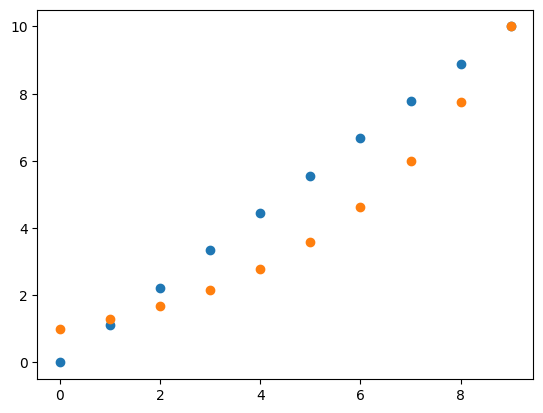

In [34]:
import matplotlib.pyplot as plt

linspace_t = torch.linspace(0, 10, steps=10)
logspace_t = torch.logspace(0, 1, steps=10)

plt.scatter(range(0, 10),linspace_t.detach())
plt.scatter(range(0, 10), logspace_t.detach())
plt.show()


**torch.eye()**

`torch.eye(n, m=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)**`

功能：创建单位对角矩阵。

主要参数：

n (int) - 矩阵的行数

m (int, optional) - 矩阵的列数，默认值为n，即默认创建一个方阵

example:

In [36]:
print(torch.eye(3))
print(torch.eye(3, 3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


**torch.empty**

`torch.empty(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False)`

功能：依size创建“空”张量，这里的“空”指的是不会进行初始化赋值操作。

**torch.empty_like()**

`torch.empty_like(input, dtype=None, layout=None, device=None, requires_grad=False)`

**torch.empty_strided**

`torch.empty_strided(size, stride, dtype=None, layout=None, device=None, requires_grad=False, pin_memory=False)`

功能: 创建一个具有指定形状、步幅（stride）和数据类型的张量。

In [40]:
print(torch.empty(2, 3))
print(torch.empty_strided((2,3), (3,1)))

tensor([[2.0938e+34, 1.4111e-42, 0.0000e+00],
        [1.8750e+00, 0.0000e+00, 2.0000e+00]])
tensor([[2.0931e+34, 1.4111e-42, 4.2039e-45],
        [5.6052e-45, 7.0065e-45, 8.4078e-45]])


### 4.2.3 依概率分布创建

**torch.norm()**

`torch.normal(mean, std, out=None)`

功能：为每一个元素以给定的mean和std用**高斯分布生成随机数**

主要参数：

mean (Tensor or Float) - 高斯分布的均值，

std (Tensor or Float) - 高斯分布的标准差

特别注意事项：

mean和std的取值分别有2种，共4种组合，不同组合产生的效果也不同，需要注意

mean为张量，std为张量，torch.normal(mean, std, out=None)，每个元素从不同的高斯分布采样，分布的均值和标准差由mean和std对应位置元素的值确定；

mean为张量，std为标量，torch.normal(mean, std=1.0, out=None)，每个元素采用相同的标准差，不同的均值；

mean为标量，std为张量，torch.normal(mean=0.0, std, out=None)， 每个元素采用相同均值，不同标准差；

mean为标量，std为标量，torch.normal(mean, std, size, *, out=None) ，从一个高斯分布中生成大小为size的张量；

In [41]:
import torch

mean = torch.arange(1, 11.)
std = torch.arange(1, 0, -0.1)
normal = torch.normal(mean=mean, std=std)
print("mean: {}, \nstd: {}, \nnormal: {}".format(mean, std, normal))

mean: tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 
std: tensor([1.0000, 0.9000, 0.8000, 0.7000, 0.6000, 0.5000, 0.4000, 0.3000, 0.2000,
        0.1000]), 
normal: tensor([2.2586, 2.0777, 4.2399, 5.0085, 5.7588, 5.8595, 6.7206, 8.1392, 8.9401,
        9.9177])


**torch.rand()**

`torch.rand(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`

功能：在区间[0, 1)上，生成均匀分布。

**torch.rand_like()**

**torch.rand()**

torch.randint(low=0, high, size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：在区间[low, high)上，生成整数的均匀分布。

**torch.randint_like()**

**torch.randint_like()**

torch.randn(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

功能：生成形状为size的标准正态分布张量。


## 五.张量的操作

主要包括拼接（concat，stack），拆分（chunk，split），改变形状（permute，reshape）等操作，具体不仔细列举，使用时具体情况进行分析。

| 名称  |  用途  |
|:------:|:---------:|
|  cat  | 用于向量的特征融合拼接|
|  concat  | 向量的按着某一维度特征融合拼接|
|  column_stack  | 水平堆叠张量。即第二个维度上增加，等同于torch.hstack。|
|  vstack   | 垂直堆叠 |
|  stack   | 在新的轴上拼接张量。与hstack\vstack不同，它是新增一个轴。默认从第0个轴插入新轴。|
|  chunk  | 将向量按某一维度进行拆分|
|  dsplit  | 类似numpy.dsplit().， 将张量按索引或指定的份数进行切分|
|  split  | 按给定的大小切分出多个张量|
|  permute  | 交换轴|
|  reshape | 改变形状，要求改变前后的两个tensor元素相等|
| transpose  | 用于交换张量中的两个维度|
|  unsqueeze  | 增加一个轴，常用于匹配数据维度|
|  squeeze  | 去除张量中所有（指定维度）大小为1的维度|
| nonzero |返回非零的索引|

In [4]:
import torch

tensor_e = torch.tensor([[1, 2], [3, 4], [5, 6]])
tensor_f = torch.tensor([[7, 8], [9, 10], [11, 12]])

# 沿着行拼接
tensor_concat = torch.concat((tensor_e, tensor_f), dim=0)
print("torch.concat(dim=0):\n", tensor_concat)

# 沿着列拼接
tensor_concat = torch.concat((tensor_e, tensor_f), dim=1)
print("torch.concat(dim=1):\n", tensor_concat)

# 使用 vstack 沿列堆叠
result = torch.vstack((tensor_e, tensor_f))

print("torch.vstack():\n", result)

# 使用 column_stack 沿列堆叠
result = torch.column_stack((tensor_e, tensor_f))

print("torch.column_stack():\n", result)

# 使用 stack堆叠
result = torch.stack((tensor_e, tensor_f), dim=0)

print("torch.stack():\n", result)

# 创建一个4x4的张量
tensor = torch.tensor([[1, 2, 3, 4],
                       [5, 6, 7, 8],
                       [9, 10, 11, 12],
                       [13, 14, 15, 16]])

# 将张量沿着第0维（行）分割成两块
chunks = torch.chunk(tensor, 2, dim=0)

# 输出结果
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}:\n{chunk}")

# 按指定的大小分割：第一个块1行，第二个块2行，第三个块1行
split_tensors = torch.split(tensor, [1, 2, 1], dim=0)

# 输出结果
for i, split_tensor in enumerate(split_tensors):
    print(f"Split {i+1}:\n{split_tensor}")
    

# 创建一个形状为 (2, 3, 4) 的张量
x = torch.tensor([[[ 1,  2,  3,  4],
                   [ 5,  6,  7,  8],
                   [ 9, 10, 11, 12]],

                  [[13, 14, 15, 16],
                   [17, 18, 19, 20],
                   [21, 22, 23, 24]]])
y = torch.permute(x, (2, 1, 0))
print("torch.permute:\n",y)
y = torch.transpose(x, 0, 2)
print("torch.transpose:\n",y)


torch.concat(dim=0):
 tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12]])
torch.concat(dim=1):
 tensor([[ 1,  2,  7,  8],
        [ 3,  4,  9, 10],
        [ 5,  6, 11, 12]])
torch.vstack():
 tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12]])
torch.column_stack():
 tensor([[ 1,  2,  7,  8],
        [ 3,  4,  9, 10],
        [ 5,  6, 11, 12]])
torch.stack():
 tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]])
Chunk 1:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
Chunk 2:
tensor([[ 9, 10, 11, 12],
        [13, 14, 15, 16]])
Split 1:
tensor([[1, 2, 3, 4]])
Split 2:
tensor([[ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
Split 3:
tensor([[13, 14, 15, 16]])
torch.permute:
 tensor([[[ 1, 13],
         [ 5, 17],
         [ 9, 21]],

        [[ 2, 14],
         [ 6, 18],
         [10, 22]],

        [[ 3, 15],
       

## 五.张量的随机种子

随机种子（Random Seed）是一种控制随机数生成器起始状态的机制，给定一个初始状态（即种子），它每次都会生成相同的随机数序列。

| | |
|------|--------|
| seed | 返回一个新的随机种子值，但不会设置全局随机种子 |
| manual_seed | 设置全局的随机种子，确保CPU上的随机操作是可重复的，建议设置为42|
| initial_seed | 返回初始种子|
| get_rng_state | 返回生成器的状态|
| set_rng_state | 设置随机数生成器的状态|

以上均是设置cpu上的张量随机种子，在cuda上是另外一套随机种子，如torch.cuda.manual_seed_all(seed)

In [12]:
import torch

# 生成一个新的随机种子
seed_value = torch.seed()
print("当前种子值:", seed_value)

# 设置全局随机种子
torch.manual_seed(42)

# 获取初始随机种子值
initial_seed = torch.initial_seed()
print("初始随机种子:", initial_seed)

# 

当前种子值: 48633472717800
初始随机种子: 412


## 六.张量的数学运算

张量还提供大量数学操作，估计了一下，有快一百个函数，这里就不再一一分析，只需要知道有哪几大类，用到的时候来查吧。
   - [Pointwise Ops](https://pytorch.org/docs/stable/torch.html#pointwise-ops) 逐元素的操作，如abs, cos, sin, floor, floor_divide, pow等
   - [Reduction Ops](https://pytorch.org/docs/stable/torch.html#reduction-ops) 减少元素的操作，如argmax, argmin, all, any, mean, norm, var等
   - [Comparison Ops](https://pytorch.org/docs/stable/torch.html#comparison-ops) 对比操作， 如ge, gt, le, lt, eq, argsort, isnan, topk,
   - [Spectral Ops](https://pytorch.org/docs/stable/torch.html#pointwise-ops) 谱操作，如短时傅里叶变换等各类信号处理的函数。
   - [Other Operations](https://pytorch.org/docs/stable/torch.html#pointwise-ops) 其它， clone， diag，flip等
   - [BLAS and LAPACK Operations](https://pytorch.org/docs/stable/torch.html#pointwise-ops) BLAS（Basic Linear Algebra Subprograms）基础线性代数）操作。如, addmm, dot, inner, svd等。